# Sigmoid + BCEWithLogitsLoss

学会使用 BCEWithLogitsLoss 处理二分类/多标签任务

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$

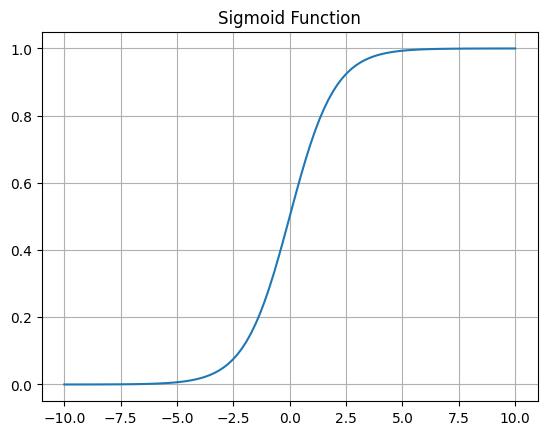

In [2]:
x = torch.linspace(-10, 10, steps=100)
y = torch.sigmoid(x)

import matplotlib.pyplot as plt

plt.plot(x.numpy(), y.numpy())
plt.title("Sigmoid Function")
plt.grid(True)
plt.show()

In [9]:
# 假设我们有一批样本（batch_size = 4）
logits = torch.tensor([2.0, -1.0, 0.0, 4.0])  # 模拟网络输出的 logits
labels = torch.tensor([1.0, 0.0, 1.0, 1.0])  # Ground-truth 标签（注意是 float 类型）

loss_fn = nn.BCEWithLogitsLoss()
loss = loss_fn(logits, labels)
losses = F.binary_cross_entropy_with_logits(logits, labels, reduction='none')

print("Logits (raw outputs):", logits)
print("Labels:", labels)
print("Loss value:", loss.item())
print("----------------------------------------")
print("中间过程:")
print("通过sigmoid计算probs", torch.sigmoid(logits))
print("逐个样本计算二分交叉熵: loss_i = -[yi*log(pi)+(1-yi)*log(1-pi)]")
print("Per-sample losses:", losses)
print("各分量loss取平均:", losses.mean())

Logits (raw outputs): tensor([ 2., -1.,  0.,  4.])
Labels: tensor([1., 0., 1., 1.])
Loss value: 0.28787171840667725
----------------------------------------
中间过程:
probs tensor([0.8808, 0.2689, 0.5000, 0.9820])
逐个样本计算二分交叉熵: loss_i = -[yi*log(pi)+(1-yi)*log(1-pi)]
Per-sample losses: tensor([0.1269, 0.3133, 0.6931, 0.0181])
各分量loss取平均: tensor(0.2879)


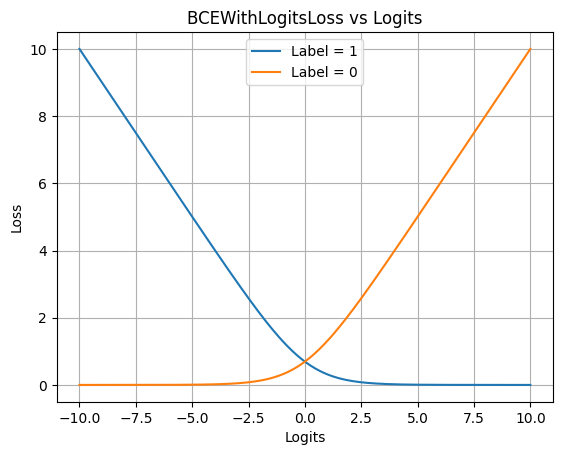

In [10]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# 200个logit输入点，从-10到10
logits_range = torch.linspace(-10, 10, 200)

# 每个logit计算单独loss
loss_pos = F.binary_cross_entropy_with_logits(logits_range, torch.ones_like(logits_range), reduction='none')
loss_neg = F.binary_cross_entropy_with_logits(logits_range, torch.zeros_like(logits_range), reduction='none')

# 画图
plt.plot(logits_range.numpy(), loss_pos.numpy(), label="Label = 1")
plt.plot(logits_range.numpy(), loss_neg.numpy(), label="Label = 0")
plt.title("BCEWithLogitsLoss vs Logits")
plt.xlabel("Logits")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
